In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('abc.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [4]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


In [5]:
df.shape

(458, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [6]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [9]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [10]:
numeric_cols = df.select_dtypes(include="number").columns
numeric_cols

Index(['Number', 'Age', 'Weight', 'Salary'], dtype='object')

In [10]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [12]:
df['Salary'].isnull().sum()

11

In [15]:
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

In [16]:
df['Salary'].isnull().sum()

0

In [17]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary       0
dtype: int64

In [18]:
# Replace 'Height' with random values between 150 and 180
df['Height'] = np.random.randint(150, 181)
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,158,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,158,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,158,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,158,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,158,231,NaN,5.000000e+06


In [20]:
#Team Distribution and Percentage

team_counts = df['Team'].value_counts()
team_percentage = df['Team'].value_counts(normalize=True) * 100
round(team_percentage,2)

New Orleans Pelicans      4.15
Memphis Grizzlies         3.93
Utah Jazz                 3.49
New York Knicks           3.49
Milwaukee Bucks           3.49
Brooklyn Nets             3.28
Portland Trail Blazers    3.28
Oklahoma City Thunder     3.28
Denver Nuggets            3.28
Washington Wizards        3.28
Miami Heat                3.28
Charlotte Hornets         3.28
Atlanta Hawks             3.28
San Antonio Spurs         3.28
Houston Rockets           3.28
Boston Celtics            3.28
Indiana Pacers            3.28
Detroit Pistons           3.28
Cleveland Cavaliers       3.28
Chicago Bulls             3.28
Sacramento Kings          3.28
Phoenix Suns              3.28
Los Angeles Lakers        3.28
Los Angeles Clippers      3.28
Golden State Warriors     3.28
Toronto Raptors           3.28
Philadelphia 76ers        3.28
Dallas Mavericks          3.28
Orlando Magic             3.06
Minnesota Timberwolves    3.06
Name: Team, dtype: float64

In [21]:
# Combine into one DataFrame
team_distribution = pd.DataFrame({'Count': team_counts, 'Percentage': round(team_percentage, 2)})
team_distribution

,Count,Percentage
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28
Washington Wizards,15,3.28


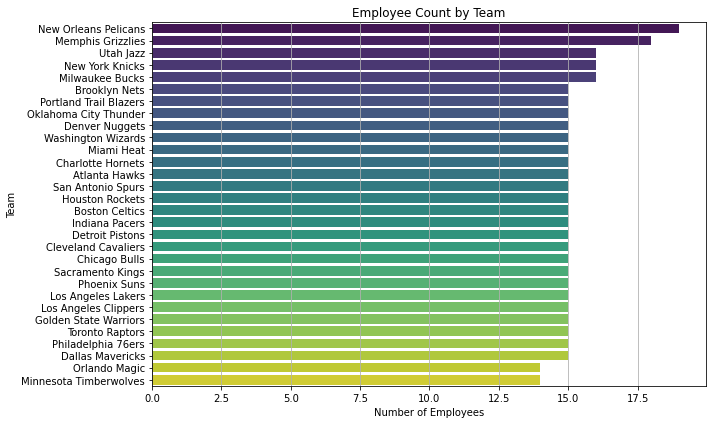

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Team', order=team_counts.index, palette='viridis')
plt.title('Employee Count by Team')
plt.xlabel('Number of Employees')
plt.ylabel('Team')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [22]:
#Segregate Employees by Position
position_counts = df['Position'].value_counts()
position_counts


SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64

In [23]:
# Combine into one DataFrame
position_distribution = pd.DataFrame({'Count': position_counts})
position_distribution

,Count
SG,102
PF,100
PG,92
SF,85
C,79


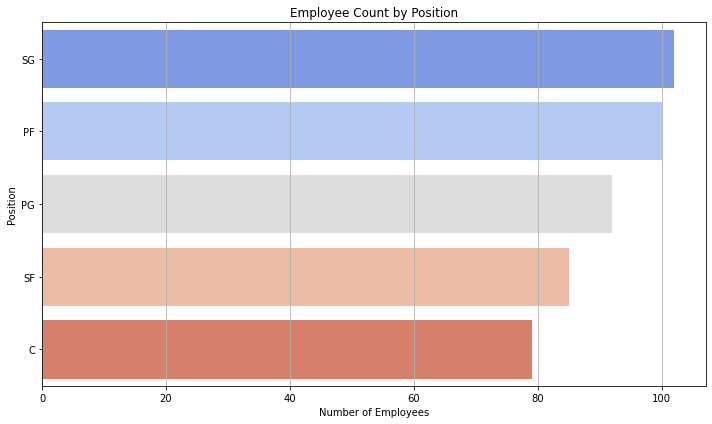

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(y=position_distribution.index, x='Count', data=position_distribution, palette='coolwarm')
plt.title('Employee Count by Position')
plt.xlabel('Number of Employees')
plt.ylabel('Position')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [27]:
# Identify the predominant age group among employees
df['Age'].unique()

array([25, 27, 22, 29, 21, 24, 20, 26, 28, 32, 23, 30, 33, 34, 37, 36, 31,
       38, 39, 19, 35, 40])

In [29]:
# Create age bins
bins = [18, 25, 30, 35, 40, 45]
labels = ['18–25', '26–30', '31–35', '36–40', '41–45']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_counts = df['Age Group'].value_counts().sort_index()
age_group_counts

18–25    200
26–30    167
31–35     68
36–40     23
41–45      0
Name: Age Group, dtype: int64

In [30]:
age_distribution = pd.DataFrame({'Count': age_group_counts})
age_distribution

,Count
18–25,200
26–30,167
31–35,68
36–40,23
41–45,0


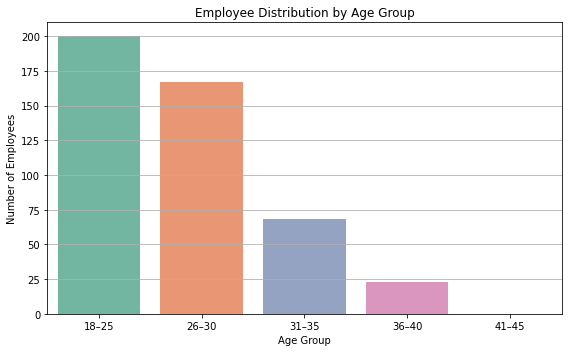

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Set2')
plt.title('Employee Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [41]:
# Team & Position with Highest Salary Expenditure
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False).reset_index()
team_salary.columns = ['Team', 'Total_Salary']
top_team_salary = team_salary.head(1)
top_team_salary

,Team,Total_Salary
0,Cleveland Cavaliers,1.118227e+08


In [42]:
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False).reset_index()
position_salary.columns = ['Position', 'Total_Salary']
top_position_salary = position_salary.head(1)
top_position_salary

,Position,Total_Salary
0,C,466377332.0


In [44]:
highest_salary_df = pd.DataFrame({
    'Category': ['Team', 'Position'],
    'Name': [top_team_salary['Team'].iloc[0], top_position_salary['Position'].iloc[0]],
    'Total_Salary': [top_team_salary['Total_Salary'].iloc[0], top_position_salary['Total_Salary'].iloc[0]]
})
highest_salary_df

,Category,Name,Total_Salary
0,Team,Cleveland Cavaliers,1.118227e+08
1,Position,C,4.663773e+08


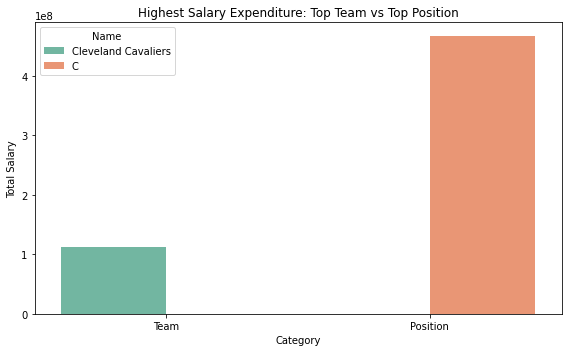

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(data=highest_salary_df, x='Category', y='Total_Salary', hue='Name', palette='Set2')

plt.title('Highest Salary Expenditure: Top Team vs Top Position')
plt.xlabel('Category')
plt.ylabel('Total Salary')
plt.tight_layout()
plt.show()

In [45]:
# Correlation Between Age and Salary
filtered_df = df[['Age', 'Salary']]

# Correlation
correlation = filtered_df.corr()
correlation

,Age,Salary
Age,1.00000,0.21117
Salary,0.21117,1.00000


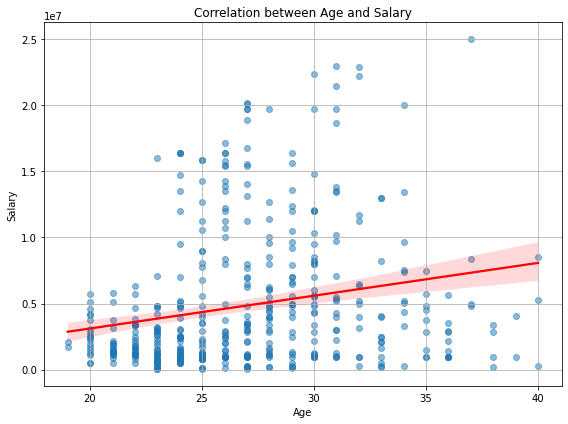

In [46]:
# Age vs Salary regplot
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Age', y='Salary', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title("Correlation between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

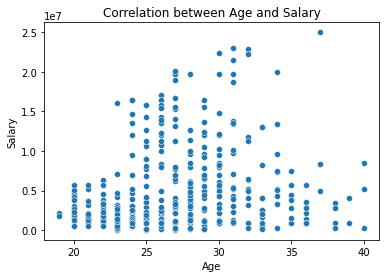

In [34]:
# Age vs Salary scatterplot
sns.scatterplot(data=filtered_df, x='Age', y='Salary')
plt.title("Correlation between Age and Salary")
plt.show()